In [ ]:
import os
from tools.dataset import split_and_move_data, get_data_loaders
from tools.viz import show_batch

In [2]:
data_dir = "data/Data_x3_ROI"
dataset_dir = "dataset/Dataset_x3_roi"

In [ ]:
split_and_move_data(data_dir, dataset_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15)

In [3]:
classes = os.listdir(data_dir)
for c in classes:
    files = os.listdir(f"{data_dir}/{c}")
    print(f'➜ {c} has {len(files)} files')

➜ normal has 3563 files
➜ osteoporosis has 3308 files


In [ ]:
train_loader, val_loader, test_loader, classes = get_data_loaders(dataset_dir, 16, True)
print(len(train_loader))
print(f"Classes: {classes}")

151
Classes: ['normal', 'osteoporosis']


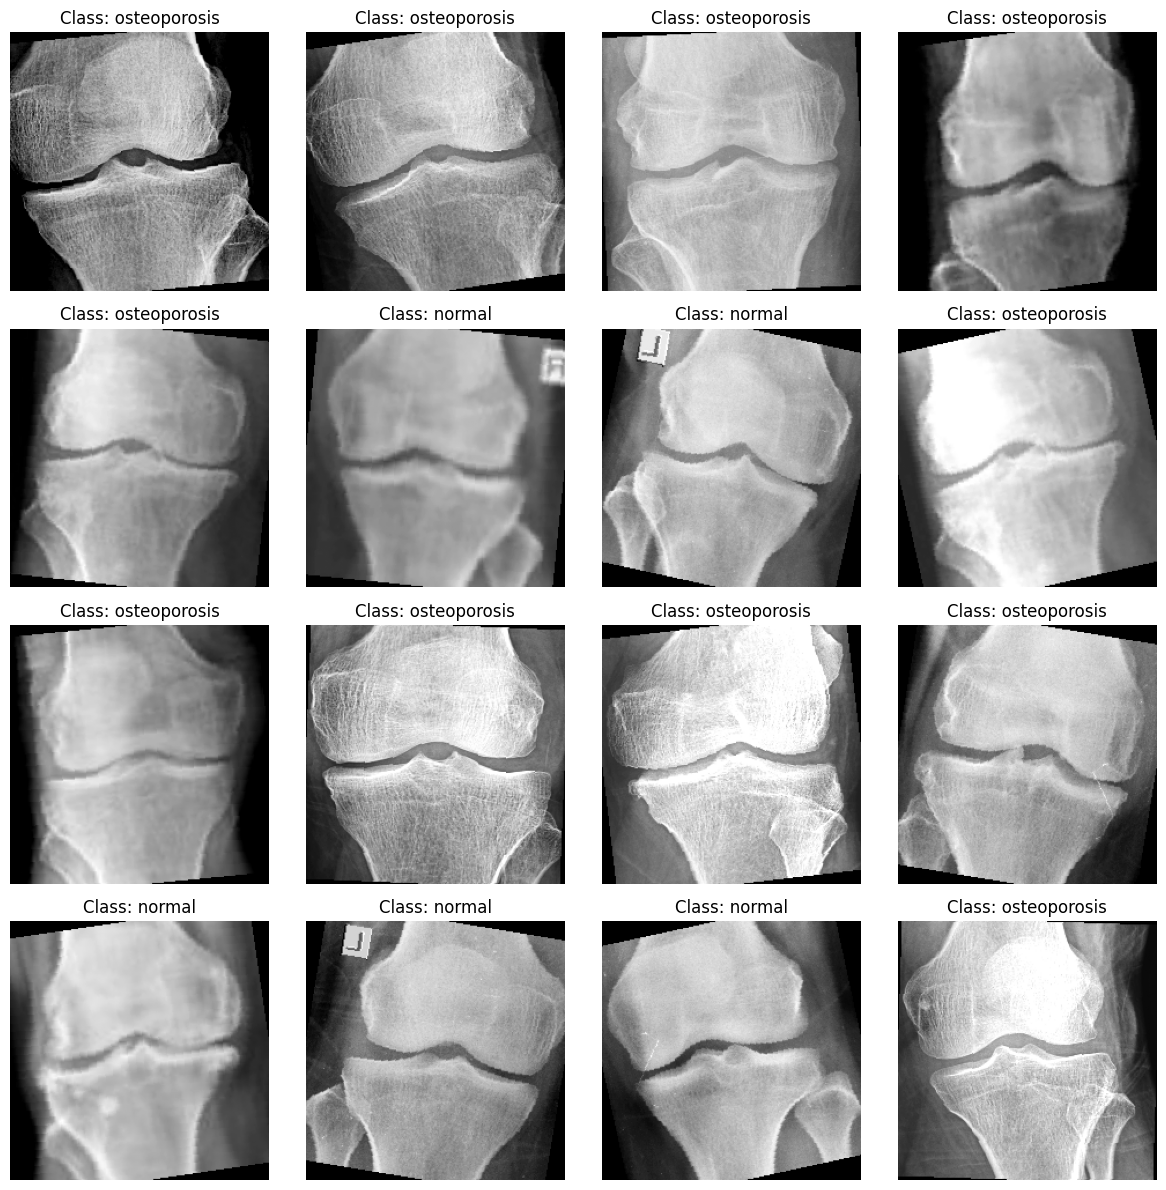

In [9]:
show_batch(train_loader)

# Models

In [6]:
from models.resnet50 import ResNet50
from models.vgg16 import VGG16
from tools.train import train_model, evaluate_model, DEVICE

🚀 CUDA available
💻 CUDA DEVICE count: 2
📦 Current DEVICE: 0
🖥️ DEVICE name: NVIDIA GeForce RTX 4090
💾 Total memory: 22683.50 MB
🧠 Allocated memory: 0.00 MB
📚 Reserved memory: 0.00 MB
✅ Selected DEVICE: cuda:0


## ResNet-50

In [7]:
model_resnet = ResNet50(num_classes=len(classes)).to(DEVICE)

In [ ]:
'''
    Params:
    - model: Mô hình để huấn luyện
    - train_loader: Bộ dữ liệu đã được gom thành từng batch để train
    - val_loader: Bộ dữ liệu đã được gom thành từng batch để đánh giá trong lúc train
    **kwargs: các tham số khác
        + device = None
        + num_epochs: int = 100                     - số lượng epoch (mặc định 100)
        + lr: float = 1e-3                          - tốc độ học (mặc định 1e-3)
        + flag: str = model._get_name()             - tên file log quá trình training
        + early_stopping_patience: int = 10         - theo dõi 10 epoch gần nhất
        + early_stopping_delta: float = 1e-3        - nếu dao động nhỏ hơn 0.0001 thì dừng
        + loss: str = "CrossEntropy"                - tên hàm loss sử dụng [CrossEntropy, Focal, LabelSmoothing]
        + optimizer: str = "Adam"                   - tên hàm tối ưu [Adam, Adamw, Radam, Lookahead, Sgd]
        + focal_alpha: list = [0.25, 0.75]          - tham số cho hàm loss là 'Focal'
        + focal_gamma: float = 2.0                  - tham số cho hàm loss là 'Focal'
        + smoothing: float = 0.1                    - tham số cho hàm loss là 'LabelSmoothing'
'''

params = {
    "device": DEVICE,
    "num_epochs": 200,
    "transform_image": False,
    "loss": "CrossEntropy",
    "optimizer": "Adamw",
    "scheduler": "Onecycle",
}
folder = train_model(model_resnet, train_loader, val_loader, **params)

In [9]:
print("Evaluating ResNet-50")
evaluate_model(model_resnet, test_loader, os.path.join(folder, "best.pth"), classes, folder)

## VGG16

In [10]:
model_vgg = VGG16(num_classes=len(classes)).to(DEVICE)

In [ ]:
params = {
    "device": DEVICE,
    "num_epochs": 200
}
folder = train_model(model_vgg, train_loader, val_loader, **params)

In [ ]:
print("Evaluating VGG16...")
evaluate_model(model_vgg, test_loader, os.path.join(folder, "best.pth"), classes, folder)